### 🧠 RL Agent for Traffic Optimization

* This notebook trains a PPO agent using Stable-Baselines3 to optimize traffic light control in our custom gym environment.

In [ ]:
# !pip install -r requirements.txt

In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from environment.gym_env import TrafficEnv

In [2]:
# ✅ Check environment compatibility
env = TrafficEnv()
check_env(env)

##### 🎓 Train the PPO Agent

In [ ]:
# 🎓 Train PPO Agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=50000)

# 💾 Save model
model.save("./models/ppo_traffic")

##### 🎮 Evaluate

In [6]:
obs, _ = env.reset()
total_reward = 0
queue_history = []

for _ in range(100):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, _ = env.step(action)
    queue_history.append(obs.copy())
    total_reward += reward
    if done or truncated:
        break


##### 📊 Visualization

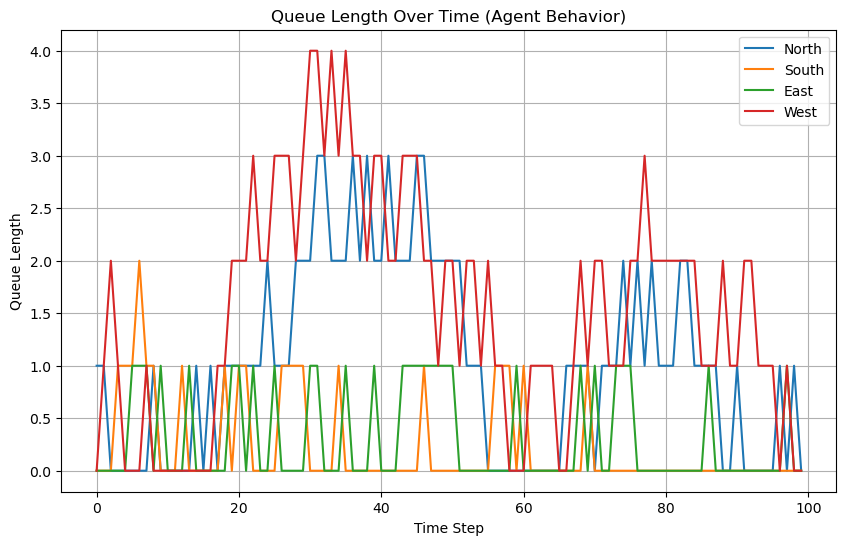

In [7]:

queue_history = np.array(queue_history)
plt.figure(figsize=(10, 6))
plt.plot(queue_history[:, 0], label='North')
plt.plot(queue_history[:, 1], label='South')
plt.plot(queue_history[:, 2], label='East')
plt.plot(queue_history[:, 3], label='West')
plt.title("Queue Length Over Time (Agent Behavior)")
plt.xlabel("Time Step")
plt.ylabel("Queue Length")
plt.legend()
plt.grid(True)
plt.show()
